In [ ]:
# refer
# https://github.com/ykp2/MovieLens-100K-Data-Analysis

## Exploratory Data Analysis
* Movielens-100k dataset revolves around 3 core datasets.
    - **users, movies & ratings**
* The following useful information can be found in the dataset Readme file itself.
    - Total Ratings: 100,000 ratings
    - Total Users: 943
    - Total Movies: 1,682
    - Each user has rated at least 20 movies.
    - Movies are tagged across 19 different genres:

        `unknown, Action, Adventure, Animation, Children's, Comedy, Crime, 
        Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, 
        Romance, Sci-Fi, Thriller, War, Western`
    - Ratings Scale: Explicit 1–5 star ratings.
    - Timestamp: Ratings include UNIX timestamps (seconds since 1/1/1970 UTC).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
# load data
RATINGS_DATA_PATH = './data/feature_store/ratings.csv'
USER_DATA_PATH = './data/feature_store/users.csv'
ITEM_DATA_PATH = './data/feature_store/movies.csv'

ratings_df = pd.read_csv(RATINGS_DATA_PATH)
user_df = pd.read_csv(USER_DATA_PATH)
item_df = pd.read_csv(ITEM_DATA_PATH)

### 1) EDA: Users Dataset

In [7]:
# user_df.head()
# user_df.shape
print("\nUser dataset info:")
print(user_df.info())


User dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [8]:
# check missing values
print("\nMissing values in users:\n", user_df.isnull().sum())


Missing values in users:
 user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


#### User - Age Distribution
- The majority of users are between 20-50.
- Teen, Young adult, & Adult users seem to dominate the dataset
- Right skewness of the distribution indicates unpopularity with the older user demographic.

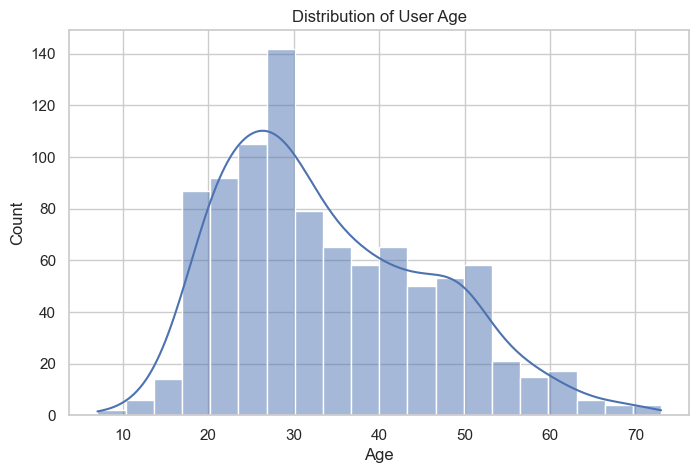

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(user_df['age'], bins=20, kde=True)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### User - Gender Distribution
- Males have watched movies more than twice the amount of Females

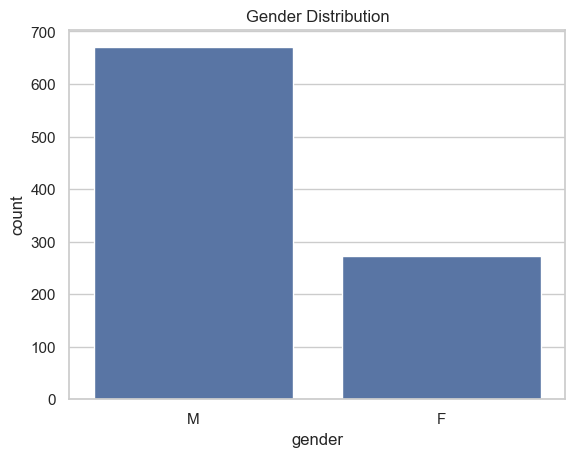

In [10]:
sns.countplot(data=user_df, x='gender')
plt.title('Gender Distribution')
plt.show()

#### User - Occupation Distribution
- Students have watched movies (which makes sense and also gets supported by the above age distribution plot), while doctors are the least.
- Top occupations include student, educator, engineer, & librarian: probably reflecting the early digital service adoption by them.

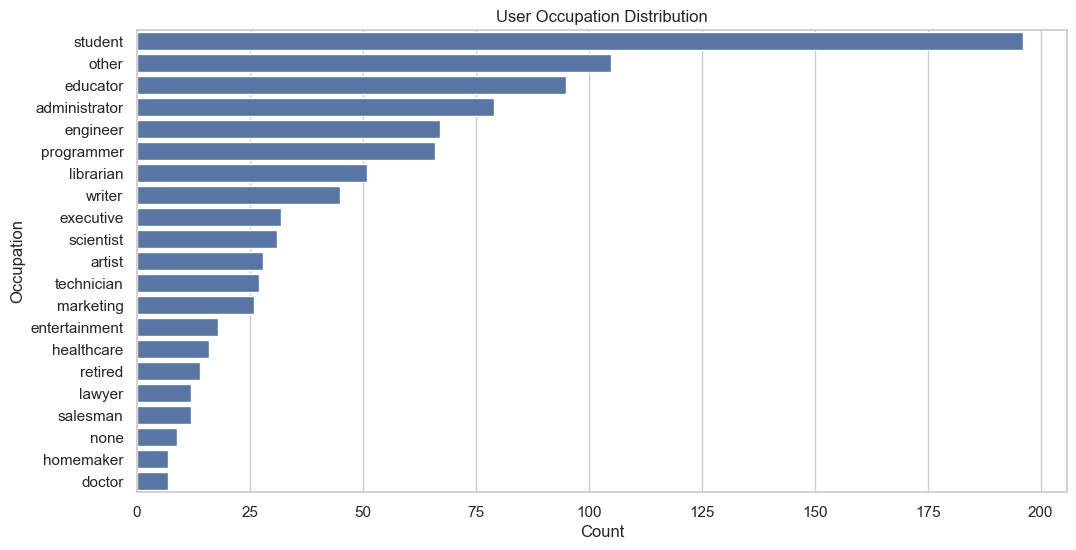

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=user_df, y='occupation', order=user_df['occupation'].value_counts().index)
plt.title('User Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

#### User - Age by Gender
- Relatively the same

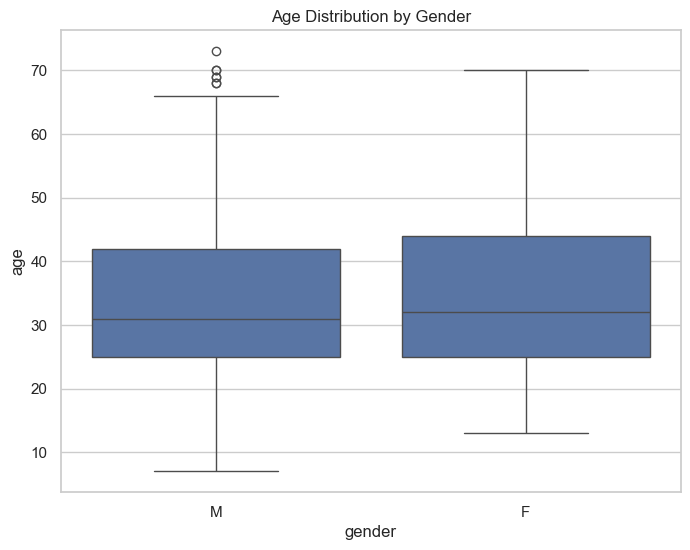

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=user_df, x='gender', y='age')
plt.title('Age Distribution by Gender')
plt.show()

### 2) EDA: Movies Dataset

In [13]:
# item_df.head()
# item_df.shape
print("\nMovie dataset info:")
print(item_df.info())


Movie dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null 

In [14]:
# check missing values
print("\nMissing values in users:\n", item_df.isnull().sum())


Missing values in users:
 movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
genres                   0
year                     0
dtype: int64


#### Movies - Genre Distribution

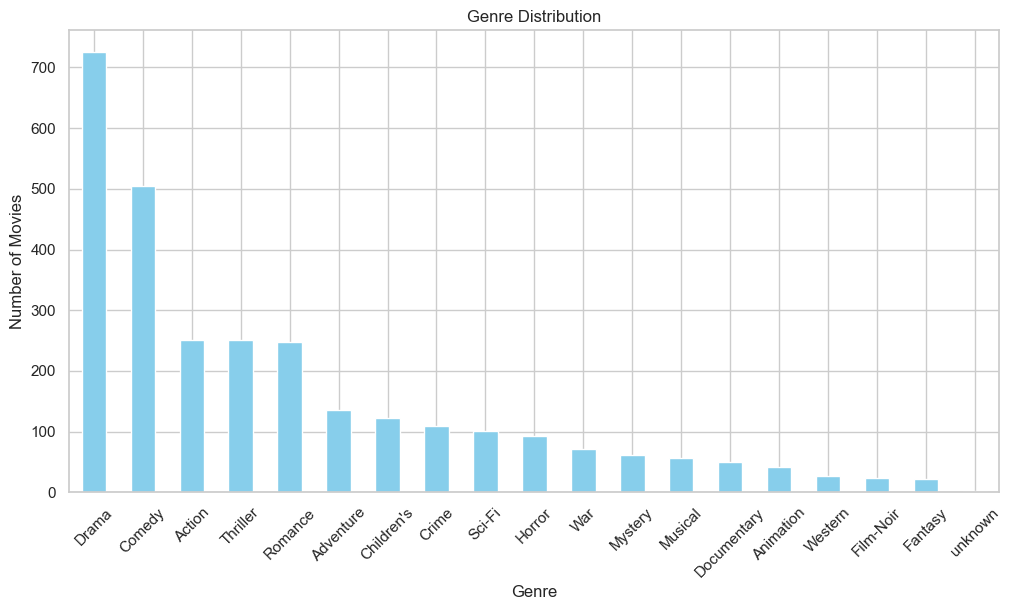

In [20]:
# Genre columns
genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary',
               'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
               'Thriller', 'War', 'Western']

genre_counts = item_df[genre_cols].sum()
genre_counts.index = genre_cols

plt.figure(figsize=(12,6))
genre_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


#### Movies - Number of Genres per Movie

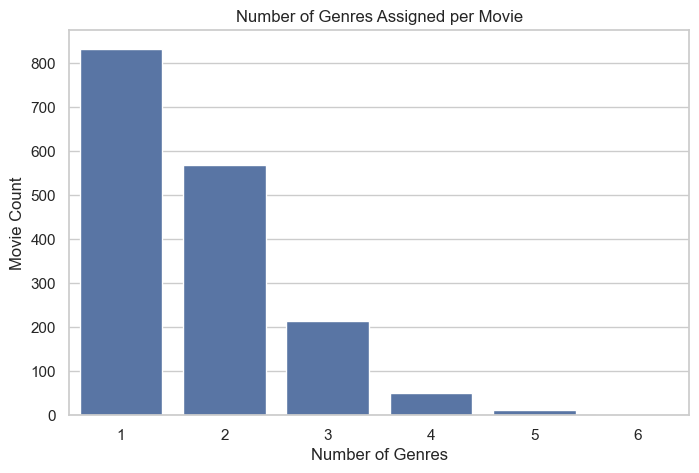

In [21]:
item_df['num_genres'] = item_df[genre_cols].sum(axis=1)

plt.figure(figsize=(8,5))
sns.countplot(x='num_genres', data=item_df)
plt.title('Number of Genres Assigned per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Movie Count')
plt.show()


#### Movies per Year

C:\Users\dgrub\AppData\Local\Temp\ipykernel_47556\1175069417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=item_df, x='release_year', palette='coolwarm',


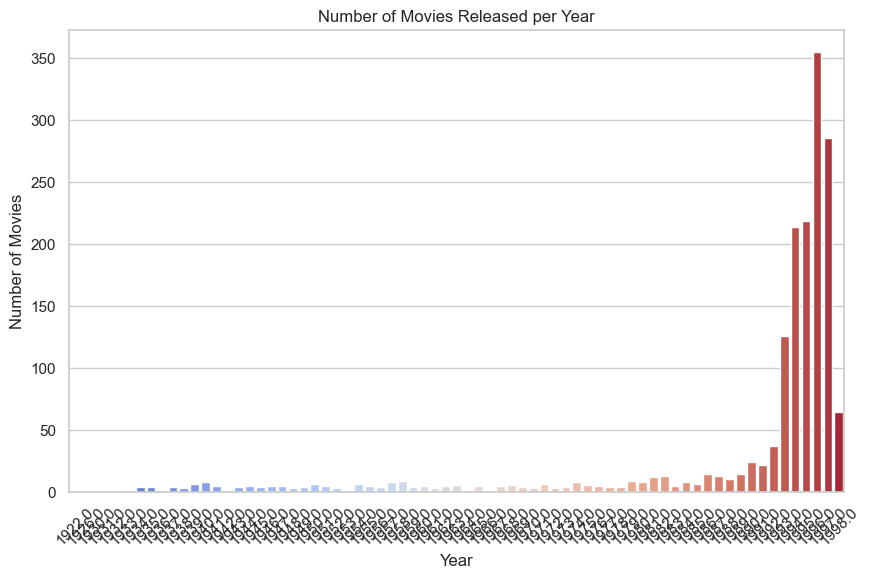

In [22]:
# Extract release year
item_df['release_year'] = pd.to_datetime(item_df['release_date'], errors='coerce').dt.year

plt.figure(figsize=(10,6))
sns.countplot(data=item_df, x='release_year', palette='coolwarm',
              order=item_df['release_year'].value_counts().sort_index().index)
plt.xticks(rotation=45)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()
